# Portal frame with rooftruss

In [1]:
import numpy as np
import sys

sys.path.append('S:\\91202_METKU\\Kristo\\Python\\frame_2d_git\\src')
from truss2d import Truss2D, TopChord, BottomChord, TrussWeb, TrussJoint
from frame2d.frame2d import Frame2D, SteelColumn, FixedSupport, LineLoad


Node coordinates for truss

In [2]:
X = np.array([0,01.714,03.429, 05.143, 06.857, 08.571, 10.286, 12.,
              13.714, 15.429, 17.143, 18.857, 20.571, 22.286, 24])
Y = np.array([-01.8, 00.086, -01.8, 00.257, -01.8, 00.429, -01.8, 00.6,
              -01.8,00.428, -01.8, 00.257, -01.8, 00.086, -01.8])

Create frame and add columns and supports

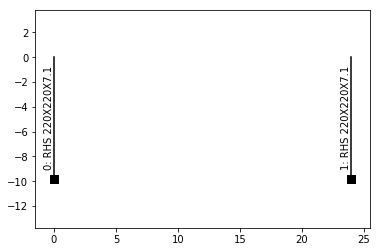

In [3]:
# INITIALIZE EMPTY FRAME
frame = Frame2D()
# COLUMNS
col1 = SteelColumn([[0,0],[0, -9.8]], profile="RHS 220x220x7.1")
col2 = SteelColumn([[24,0],[24, -9.8]], profile="RHS 220x220x7.1")
frame.add(col1)
frame.add(col2)
# SUPPORTS
frame.add(FixedSupport([0, -9.8]))
frame.add(FixedSupport([24, -9.8]))
frame.plot()

Create a truss and add top chords and bottom chord.
Iterate through all node coordinates from X and Y arrays and add webs to those coordinates.

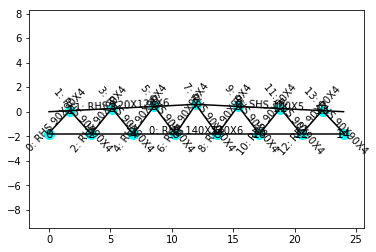

In [4]:
truss = Truss2D(num_elements=1, fem=frame.f)
bottom_chord = BottomChord([[0, -1.8],[24,-1.8]], material="S420", profile="RHS 140x140x6")
top_chord1 = TopChord([[0,0], [12,0.6]], material="S420", profile="RHS 120x120x6")
top_chord2 = TopChord([[12,0.6], [24,0]])
truss.add(bottom_chord)
truss.add(top_chord1)
truss.add(top_chord2)
for i in range(len(X)-1):
    truss.add(TrussWeb([X[i], Y[i]], [X[i+1], Y[i+1]], 'global', profile="Rhs 90x90x4"))
truss.plot()

Add truss to frame and add loads. Generate truss-frame and calculate forces.

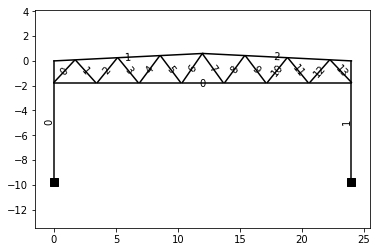

In [5]:
# ADD TRUSS TO FRAME
frame.add(truss)
# LOADS
frame.add(LineLoad(bottom_chord, [-0.69, -0.69], 'y'))
frame.add(LineLoad(top_chord1, [-21.45, -21.45], 'y'))
frame.add(LineLoad(top_chord2, [-21.45, -21.45], 'y'))
frame.add(LineLoad(col1, [3.51, 3.51], 'x'))
frame.add(LineLoad(col2, [0.17, 0.17], 'x'))
# GENERATE
frame.generate()
# CALCULATE
frame.calculate()
frame.plot(print_text=False, loads=False)

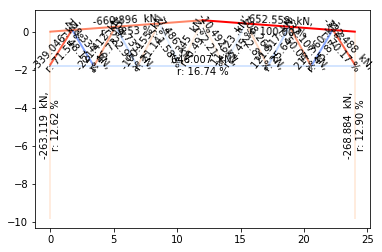

In [6]:
frame.plot_normal_force()

In [7]:
for member in frame.members.values():
    print(f' {member.mtype} {member.mem_id}:  {member.ned:.3f} kN')

 column 0:  -263.119 kN
 column 1:  -268.884 kN
 bottom_chord 0:  646.007 kN
 top_chord 1:  -660.896 kN
 top_chord 2:  -652.559 kN
 web 0:  -339.046 kN
 web 1:  228.334 kN
 web 2:  -221.412 kN
 web 3:  108.733 kN
 web 4:  -100.155 kN
 web 5:  7.486 kN
 web 6:  -2.345 kN
 web 7:  -10.492 kN
 web 8:  11.623 kN
 web 9:  -108.266 kN
 web 10:  121.517 kN
 web 11:  -237.107 kN
 web 12:  217.360 kN
 web 13:  -332.488 kN
